Measurement outcomes: {'1100': 242, '0000': 255, '1000': 236, '0100': 291}
Measured x: 4
Estimated phase: 0.25
Candidate period r = 4
Factors found: 3, 5


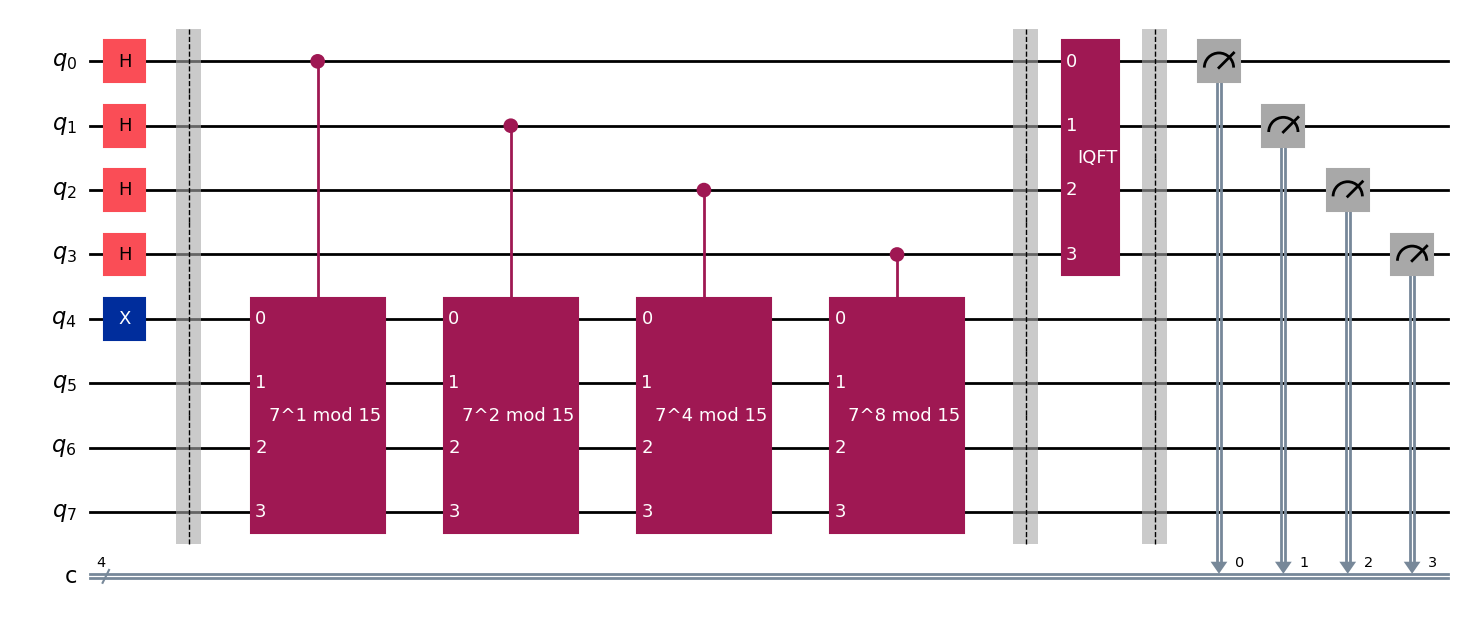

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from math import gcd
from fractions import Fraction

# Parameters
N = 15
a = 7
if gcd(a, N) != 1:
    print(f"Factor found classically: {gcd(a, N)}")
    exit()

# Registers
n = 4
m = 4
qreg = QuantumRegister(n + m, 'q')
creg = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qreg, creg)

# Step 1: Initialize target to |1⟩
qc.x(qreg[n])

# Step 2: Hadamard on counting qubits
for q in range(n):
    qc.h(qreg[q])
qc.barrier()

# Step 3: Controlled modular exponentiation for a = 7
def mod_exp_7_mod_15(power):
    U = QuantumCircuit(4, name=f'7^{power} mod 15')
    p = power % 4  # Period is 4
    if p == 1:  # |1⟩ -> |7⟩
        U.x(0)
        U.x(1)
        U.x(2)  # |0001⟩ -> |0111⟩
    elif p == 2:  # |1⟩ -> |4⟩
        U.x(2)  # |0001⟩ -> |0100⟩
    elif p == 3:  # |1⟩ -> |13⟩
        U.x(0)
        U.x(2)
        U.x(3)  # |0001⟩ -> |1101⟩
    elif p == 0:  # |1⟩ -> |1⟩
        pass  # Identity
    return U.to_gate()

for q in range(n):
    power = 2**q
    U_gate = mod_exp_7_mod_15(power).control(1)
    U_gate.name = f"7^{power} mod 15"
    qc.append(U_gate, [qreg[q]] + qreg[n:n+m])

# Step 4: Inverse QFT
qc.barrier()
qc.append(QFT(n, inverse=True), qreg[:n])

# Step 5: Measure
qc.barrier()
qc.measure(qreg[:n], creg)

# Simulate
simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)
result = simulator.run(compiled_qc, shots=1024).result()
counts = result.get_counts()

# Post-processing
print("Measurement outcomes:", counts)
most_frequent = max(counts, key=counts.get)
x = int(most_frequent, 2)
print(f"Measured x: {x}")
phase = x / (2 ** n)
print(f"Estimated phase: {phase}")
r = Fraction(phase).limit_denominator(N).denominator
print(f"Candidate period r = {r}")

if pow(a, r, N) != 1:
    print("Period verification failed, adjusting...")
    for mult in range(2, 5):
        r_try = r * mult
        if pow(a, r_try, N) == 1:
            r = r_try
            print(f"Adjusted period r = {r}")
            break
    else:
        print("No valid period found.")
        exit()

if r % 2 == 0:
    plus = pow(a, r//2, N) + 1
    minus = pow(a, r//2, N) - 1
    factor1 = gcd(minus, N)
    factor2 = gcd(plus, N)
    if 1 < factor1 < N and 1 < factor2 < N:
        print(f"Factors found: {factor1}, {factor2}")
    else:
        print("Factors not non-trivial.")
else:
    print("Period is odd, try again.")

# Visualize
plot_histogram(counts)
qc.draw('mpl')

Measurement outcomes: {'1000': 268, '0000': 248, '0100': 237, '1100': 271}
Measured x: 12
Estimated phase: 0.75
Candidate period r = 4
Factors found: 3, 5


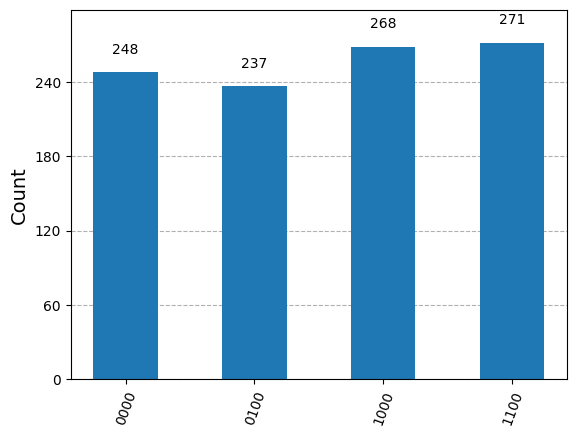

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
from math import gcd
from fractions import Fraction

# Parameters
N = 15
a = 7
if gcd(a, N) != 1:
    print(f"Factor found classically: {gcd(a, N)}")
    exit()

# Registers
n = 4
m = 4
qreg = QuantumRegister(n + m, 'q')
creg = ClassicalRegister(n, 'c')
qc = QuantumCircuit(qreg, creg)

# Step 1: Initialize target to |1⟩
qc.x(qreg[n])

# Step 2: Hadamard on counting qubits
for q in range(n):
    qc.h(qreg[q])
qc.barrier()

# Step 3: Controlled modular exponentiation for a = 7
def mod_exp_7_mod_15(power):
    U = QuantumCircuit(4, name=f'7^{power} mod 15')
    p = power % 4  # Period is 4
    if p == 1:  # |1⟩ -> |7⟩
        U.x(0)
        U.x(1)
        U.x(2)  # |0001⟩ -> |0111⟩
    elif p == 2:  # |1⟩ -> |4⟩
        U.x(2)  # |0001⟩ -> |0100⟩
    elif p == 3:  # |1⟩ -> |13⟩
        U.x(0)
        U.x(2)
        U.x(3)  # |0001⟩ -> |1101⟩
    elif p == 0:  # |1⟩ -> |1⟩
        pass  # Identity
    return U.to_gate()

for q in range(n):
    power = 2**q
    U_gate = mod_exp_7_mod_15(power).control(1)
    U_gate.name = f"7^{power} mod 15"
    qc.append(U_gate, [qreg[q]] + qreg[n:n+m])

# Step 4: Inverse QFT
qc.barrier()
qc.append(QFT(n, inverse=True), qreg[:n])

# Step 5: Measure
qc.barrier()
qc.measure(qreg[:n], creg)

# Simulate
simulator = AerSimulator()
compiled_qc = transpile(qc, simulator)
result = simulator.run(compiled_qc, shots=1024).result()
counts = result.get_counts()

# Post-processing
print("Measurement outcomes:", counts)
most_frequent = max(counts, key=counts.get)
x = int(most_frequent, 2)
print(f"Measured x: {x}")
phase = x / (2 ** n)
print(f"Estimated phase: {phase}")
r = Fraction(phase).limit_denominator(N).denominator
print(f"Candidate period r = {r}")

if pow(a, r, N) != 1:
    print("Period verification failed, adjusting...")
    for mult in range(2, 5):
        r_try = r * mult
        if pow(a, r_try, N) == 1:
            r = r_try
            print(f"Adjusted period r = {r}")
            break
    else:
        print("No valid period found.")
        exit()

if r % 2 == 0:
    plus = pow(a, r//2, N) + 1
    minus = pow(a, r//2, N) - 1
    factor1 = gcd(minus, N)
    factor2 = gcd(plus, N)
    if 1 < factor1 < N and 1 < factor2 < N:
        print(f"Factors found: {factor1}, {factor2}")
    else:
        print("Factors not non-trivial.")
else:
    print("Period is odd, try again.")

# Visualize
plot_histogram(counts)
